<a href="https://colab.research.google.com/github/ia234/Python_23/blob/main/Category_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# drive.mount('/content/drive')
%cd /content/drive/MyDrive/ai_data/

/content/drive/MyDrive/ai_data


In [2]:
import pandas as pd

# index_col = 0 specify the first column as the index.
top_articles_df = pd.read_csv('/content/drive/MyDrive/ai_data/wikipedia_top_articles_2022.csv')
top_articles_df

,article,date,views,rank,Page ID,Categories,URL,Image,Summary
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",https://ar.wikipedia.org/wiki/%D9%8A%D9%88%D8%...,https://upload.wikimedia.org/wikipedia/commons...,يوتيوب (بالإنجليزية: YouTube)‏ هو موقع ويب يسم...
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",https://ar.wikipedia.org/wiki/%D9%83%D8%B1%D9%...,https://upload.wikimedia.org/wikipedia/commons...,كريستيانو رونالدو دوس سانتوس أفيرو (تلفظ برتغا...
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",https://ar.wikipedia.org/wiki/%D9%85%D8%AD%D9%...,https://upload.wikimedia.org/wikipedia/commons...,أَبُو القَاسِم مُحَمَّدُ بْنُ عَبْدِ ٱللَّهِ ب...
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",https://ar.wikipedia.org/wiki/%D8%A3%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,أبشر، هو نظام إلكتروني أطلقته وزارة الداخلية ا...
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",https://ar.wikipedia.org/wiki/%D9%83%D8%A3%D8%...,NaN,كأس العالم 2022 هي النسخة الثانية والعشرون من ...
...,...,...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/ar/e/ee...,الشيخ عبد الله بن سليمان المنيع (1349 هـ شقراء...
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,عبد الله رشدي (3 فبراير 1984) إمام وخطيب بوزار...
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,NaN,عبد الله عباس (7 أغسطس 1988) ممثل إيراني نشأ ف...
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%...,https://upload.wikimedia.org/wikipedia/commons...,البابا فرنسيس. (باللاتينية: Franciscus)، ولد ب...


In [3]:
top_articles_df['Categories']

0       ['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...
1       ['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...
2       ['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...
3                 ['السعودية', 'برمجيات', 'حقوق الإنسان']
4       ['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...
                              ...                        
1627                     ['أعلام', 'الإسلام', 'السعودية']
1628                          ['أعلام', 'القاهرة', 'مصر']
1629         ['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']
1630    ['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...
1631                     ['أعلام', 'العراق', 'حزب البعث']
Name: Categories, Length: 1632, dtype: object

In [4]:
# Convert 'Categories' into a Python list
categories_list = top_articles_df['Categories'].tolist()
categories_list[0:3]

["['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا']",
 "['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية']",
 "['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة']"]

In [5]:
type(categories_list[0:3][0])

str

In [6]:
["['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا']",
 "['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية']",
 "['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة']"]

["['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا']",
 "['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية']",
 "['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة']"]

In [7]:
import ast
import numpy as np


# Convert the string representations into lists of keywords, handling "nan" values
list_of_lists = []

for s in categories_list:
    try:
        if isinstance(s, str) and not pd.isna(s):
            list_of_lists.append(ast.literal_eval(s))
        else:
            list_of_lists.append('None')  # Handle "nan" and other invalid strings as empty lists
    except (ValueError, SyntaxError):
        list_of_lists.append('Invalid')  # Handle invalid strings as empty lists


In [8]:
list_of_lists[:3]

[['أعمال إلكترونية',
  'إنترنت',
  'الولايات المتحدة',
  'جوجل',
  'سان فرانسيسكو',
  'شركات',
  'كاليفورنيا'],
 ['أرقام قياسية',
  'أعلام',
  'ألعاب أولمبية',
  'إسبانيا',
  'إنجلترا',
  'إيطاليا',
  'البرتغال',
  'السعودية',
  'كأس العالم',
  'كرة القدم',
  'كرة القدم الإسبانية',
  'كرة القدم الإنجليزية',
  'كرة القدم الإيطالية',
  'كرة القدم البرتغالية',
  'كرة القدم السعودية'],
 ['أعلام',
  'الإسلام',
  'السياسة',
  'الشرق الأوسط',
  'العالم الإسلامي',
  'القرآن',
  'المدينة المنورة',
  'محمد',
  'مكة']]

In [9]:
len(list_of_lists)

1632

In [10]:
type(list_of_lists[0])

list

In [11]:
from collections import Counter

# Flatten the list of lists into a single list
flat_list = [item for sublist in list_of_lists for item in sublist]

# Count the frequency of each string
string_counts = Counter(flat_list)

# Sort the string counts from highest frequency to lowest
sorted_counts = string_counts.most_common()

In [12]:
pip install arabic-reshaper python-bidi

In [13]:
visualize_sorted_counts = sorted_counts[:40]
visualize_sorted_counts

[('أعلام', 887),
 ('كرة القدم', 368),
 ('السياسة', 284),
 ('مصر', 244),
 ('الإسلام', 235),
 ('تمثيل', 232),
 ('المرأة', 227),
 ('السعودية', 216),
 ('تلفاز', 143),
 ('سينما', 136),
 ('كأس العالم', 126),
 ('عقد 2010', 100),
 ('الولايات المتحدة', 98),
 ('المملكة المتحدة', 83),
 ('موسيقى', 83),
 ('ملكية', 81),
 ('الحرب', 78),
 ('دول', 73),
 ('التاريخ', 69),
 ('فرنسا', 63),
 ('كرة القدم الإسبانية', 61),
 ('المغرب', 58),
 ('العراق', 58),
 ('آل سعود', 56),
 ('عقد 2020', 55),
 ('الشيعة', 53),
 ('مسرح', 53),
 ('علاقات دولية', 52),
 ('أدب عربي', 52),
 ('الوطن العربي', 51),
 ('إفريقيا', 51),
 ('إسبانيا', 50),
 ('سوريا', 49),
 ('مناسبات', 49),
 ('أوروبا', 47),
 ('الكويت', 47),
 ('السينما المصرية', 44),
 ('الجزائر', 43),
 ('إنجلترا', 42),
 ('جغرافيا', 41)]

In [14]:
type(visualize_sorted_counts[0])

tuple

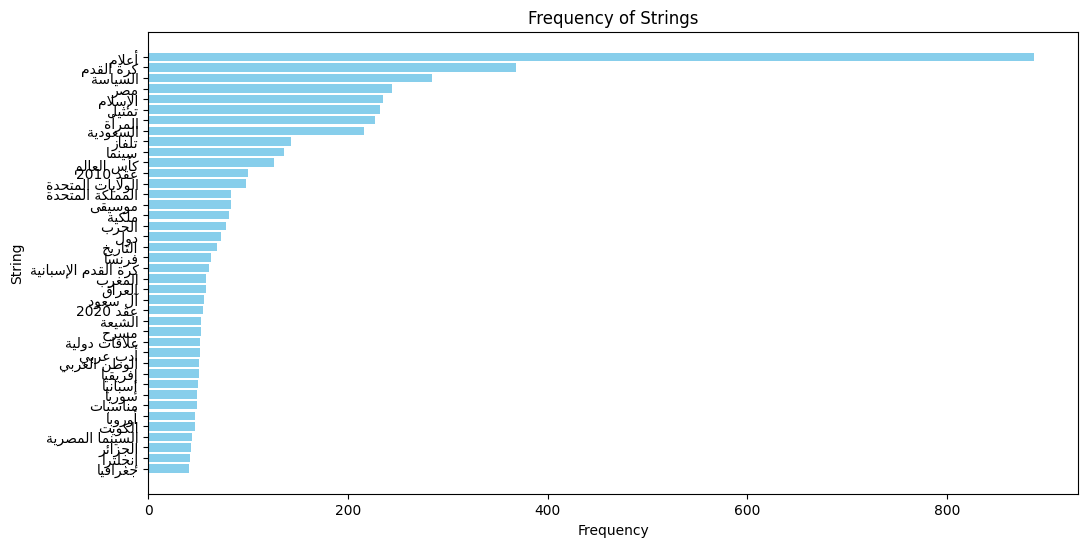

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import arabic_reshaper
from bidi.algorithm import get_display


# Extract labels and counts for plotting
labels, counts = zip(*visualize_sorted_counts)

# Reshape Arabic text and apply bidi algorithm for correct rendering
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(reshaped_labels, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('String')
plt.title('Frequency of Strings')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top
plt.show()


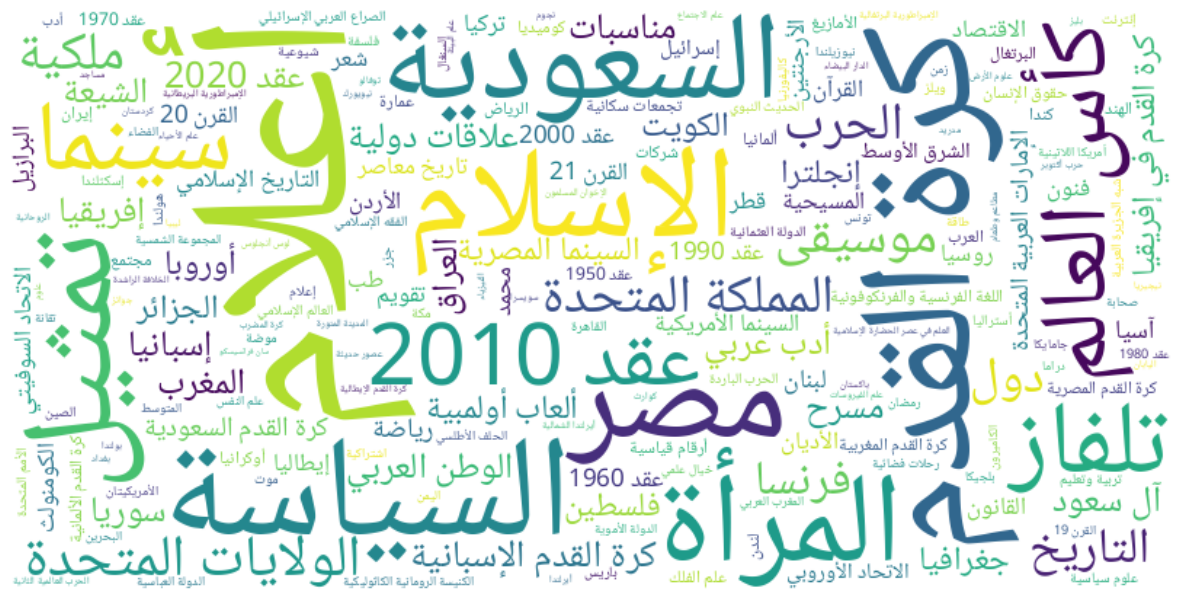

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
import itertools


# Create a word cloud with Arabic font
font_path = "/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf"  # Replace with the actual path to an Arabic font file on your system

# Check if the specified font file exists
try:
    with open(font_path, 'rb'):
        pass
except FileNotFoundError:
    raise FileNotFoundError(f"The specified font file '{font_path}' was not found. Please provide the correct path to an Arabic font file.")

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, colormap='viridis').generate_from_frequencies(string_counts)

# Reshape Arabic text and apply bidi algorithm for correct rendering in word cloud
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in string_counts.keys()]
text = " ".join(reshaped_labels)

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


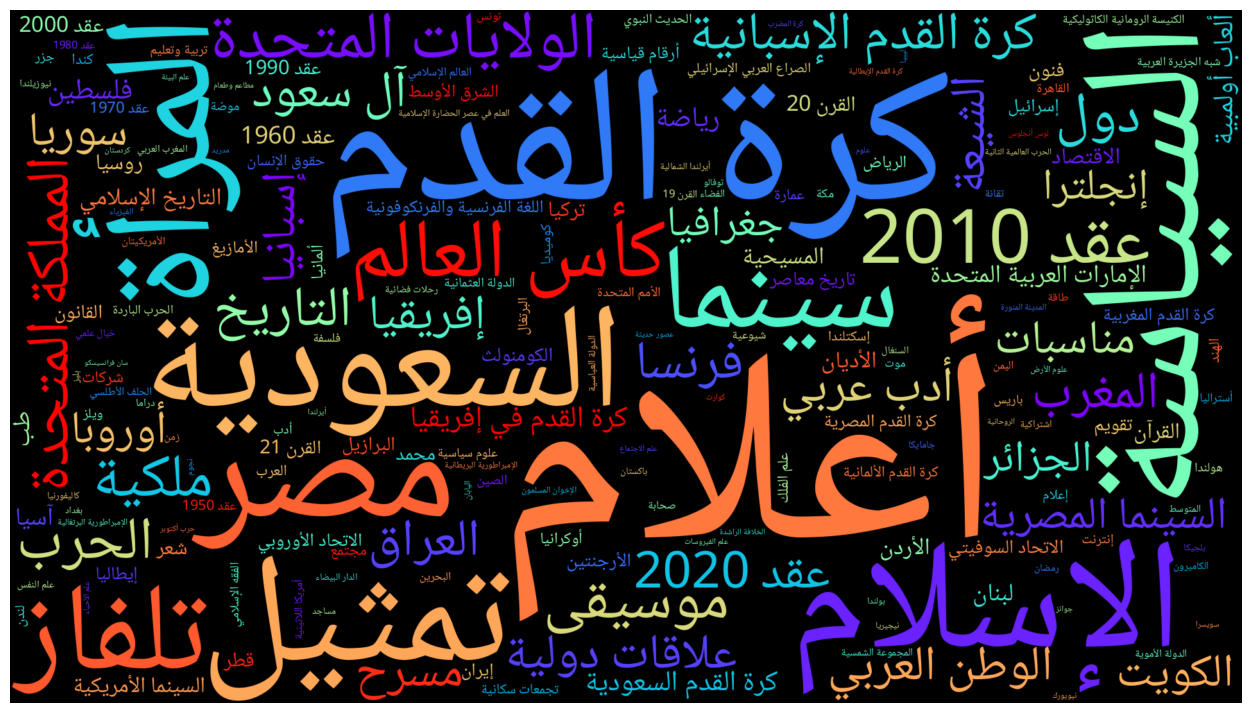

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
import itertools

# Create a WordCloud with Arabic font and customized parameters
font_path = "/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf"

# Check if the specified font file exists
try:
    with open(font_path, 'rb'):
        pass
except FileNotFoundError:
    raise FileNotFoundError(f"The specified font file '{font_path}' was not found. Please provide the correct path to an Arabic font file.")

# Create a larger WordCloud
wordcloud = WordCloud(
    width=1920,  # Increase the width and height for higher image quality
    height=1080,
    background_color='black',
    font_path=font_path,
    colormap='rainbow',  # Change the colormap to a more colorful one: rainbow, prism, jet, hsv
    collocations=False,  # Disable collocations to avoid word repetition
).generate_from_frequencies(string_counts)

# Reshape Arabic text and apply bidi algorithm for correct rendering in Word Cloud
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in string_counts.keys()]
text = " ".join(reshaped_labels)

# Display the Word Cloud with higher quality and colorful palette
plt.figure(figsize=(16, 9))  # Adjust the figure size for better visibility
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the Word Cloud with higher DPI (dots per inch)
plt.savefig("wordcloud.png", dpi=300, bbox_inches='tight')  # Adjust DPI as needed
plt.show()


In [18]:
import plotly.express as px
import pandas as pd



# Create a DataFrame from the provided data
df = pd.DataFrame(visualize_sorted_counts, columns=['Category', 'Count'])

# Create the TreeMap chart
fig = px.treemap(df, path=['Category'], values='Count')

# Customize the chart appearance (optional)
fig.update_layout(
    title='TreeMap Chart of Categories',
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margins as needed
    uniformtext_minsize=14,
    uniformtext_mode='hide',
)

# Show the chart
fig.show()


In [19]:
import plotly.graph_objects as go

# Given list of tuples with labels, counts, and image URLs
data = [('أعلام', 887, 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Ward_Cunningham_-_Commons-1.jpg/840px-Ward_Cunningham_-_Commons-1.jpg'),
        ('كرة القدم', 368, 'https://upload.wikimedia.org/wikipedia/commons/4/4a/Synthetic_Production_of_Penicillin_TR1468_crop.jpg'),
        ('السياسة', 284, 'https://upload.wikimedia.org/wikipedia/commons/e/ea/NTS_-_ETS-1_002.jpg'),
        # Add more data here
       ]

# Create a list of labels
labels = [item[0] for item in data]

# Create a list of counts
counts = [item[1] for item in data]

# Create a Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=[""] * len(labels),  # All top-level categories have no parent
    values=counts,
))

# Create a custom text for the tooltip that includes the label and value
custom_text = [f"{label}<br>Count: {count}" for label, count, _ in data]

# Update the chart layout to include the custom text in the tooltip
fig.update_traces(text=custom_text, hoverinfo='text')

# Customize the chart appearance
fig.update_layout(
    title='Sunburst Chart with Images',
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margins as needed
)

# Show the chart
fig.show()


In [20]:
top_articles_df

,article,date,views,rank,Page ID,Categories,URL,Image,Summary
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",https://ar.wikipedia.org/wiki/%D9%8A%D9%88%D8%...,https://upload.wikimedia.org/wikipedia/commons...,يوتيوب (بالإنجليزية: YouTube)‏ هو موقع ويب يسم...
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",https://ar.wikipedia.org/wiki/%D9%83%D8%B1%D9%...,https://upload.wikimedia.org/wikipedia/commons...,كريستيانو رونالدو دوس سانتوس أفيرو (تلفظ برتغا...
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",https://ar.wikipedia.org/wiki/%D9%85%D8%AD%D9%...,https://upload.wikimedia.org/wikipedia/commons...,أَبُو القَاسِم مُحَمَّدُ بْنُ عَبْدِ ٱللَّهِ ب...
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",https://ar.wikipedia.org/wiki/%D8%A3%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,أبشر، هو نظام إلكتروني أطلقته وزارة الداخلية ا...
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",https://ar.wikipedia.org/wiki/%D9%83%D8%A3%D8%...,NaN,كأس العالم 2022 هي النسخة الثانية والعشرون من ...
...,...,...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/ar/e/ee...,الشيخ عبد الله بن سليمان المنيع (1349 هـ شقراء...
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,https://upload.wikimedia.org/wikipedia/commons...,عبد الله رشدي (3 فبراير 1984) إمام وخطيب بوزار...
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",https://ar.wikipedia.org/wiki/%D8%B9%D8%A8%D8%...,NaN,عبد الله عباس (7 أغسطس 1988) ممثل إيراني نشأ ف...
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%...,https://upload.wikimedia.org/wikipedia/commons...,البابا فرنسيس. (باللاتينية: Franciscus)، ولد ب...


## Adding Country

In [24]:
df = pd.DataFrame(data)

# Drop three columns (A, C, and E)
columns_to_drop = ['URL', 'Image', 'Summary']
smaller_df = top_articles_df.drop(columns=columns_to_drop)

# Print the resulting DataFrame
smaller_df

,article,date,views,rank,Page ID,Categories
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد..."
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس..."
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'..."
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']"
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '..."
...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']"
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']"
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']"
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد..."


In [26]:
import re

# Define a function to extract countries from the categories
def extract_countries(categories):
    if isinstance(categories, str):
        country_pattern = r'(الإمارات العربية المتحدة|البحرين|الكويت|السعودية|اليمن|قطر|عُمان|الأردن|سوريا|لبنان|فلسطين|العراق|السودان|مصر|ليبيا|تونس|الجزائر|المغرب|موريتانيا|الصومال|جيبوتي|جزر القمر)'
        matches = re.findall(country_pattern, categories)
        return ', '.join(matches)
    return ''

# Apply the function to create the "country" column
smaller_df['country'] = smaller_df['Categories'].apply(extract_countries)

# Print the updated DataFrame
smaller_df

                        article        date   views  rank    Page ID  \
0                        يوتيوب  01/01/2022   18888   317    81410.0   
1             كريستيانو رونالدو  17/01/2022   67422   246    67878.0   
2                          محمد  01/01/2022   31424   175   843545.0   
3                          أبشر  01/01/2022    9603   170  5315941.0   
4               كأس العالم 2022  19/01/2022  380824   163   865496.0   
...                         ...         ...     ...   ...        ...   
1627  عبد الله بن سليمان المنيع  05/01/2022    4565     1   329607.0   
1628              عبد الله رشدي  01/01/2023    4878     1  6691256.0   
1629              عبد الله عباس  16/02/2022    4523     1  1668677.0   
1630              البابا فرنسيس  31/12/2022    6181     1  1596701.0   
1631                فاضل البراك  30/09/2022    5087     1  4778162.0   

                                             Categories  \
0     ['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...   
1     ['أرقام قيا

In [28]:
smaller_df

,article,date,views,rank,Page ID,Categories,country
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","السعودية, السعودية"
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",السعودية
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",قطر
...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",السعودية
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",مصر
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",


In [29]:
import pandas as pd
import re


# Define a function to extract countries from the categories
def extract_countries(categories):
    if isinstance(categories, str):
        country_pattern = r'(الإمارات العربية المتحدة|البحرين|الكويت|السعودية|اليمن|قطر|عُمان|الأردن|سوريا|لبنان|فلسطين|العراق|السودان|مصر|ليبيا|تونس|الجزائر|المغرب|موريتانيا|الصومال|جيبوتي|جزر القمر)'
        matches = re.findall(country_pattern, categories)
        if matches:
            unique_countries = set(matches)  # Remove duplicates by converting to a set
            return ', '.join(unique_countries)
        else:
            return 'غير عرب'
    return ''

# Apply the function to create the "country" column
smaller_df['country'] = smaller_df['Categories'].apply(extract_countries)

# Print the updated DataFrame
smaller_df

,article,date,views,rank,Page ID,Categories,country
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",غير عرب
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",السعودية
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",غير عرب
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",السعودية
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",قطر
...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",السعودية
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",مصر
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",غير عرب
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",غير عرب


In [ ]:
smaller_df

In [36]:
import pandas as pd
import re

# Your existing DataFrame top_articles_df with a "Categories" column
# ...

# Define a function to extract countries from the categories and add "آسيا", "أوروبا", "أفريقيا", "أمريكا الشمالية", and "أمريكا الجنوبية"
def extract_countries(categories):
    if isinstance(categories, str):
        country_pattern = r'(الإمارات العربية المتحدة|البحرين|الكويت|السعودية|اليمن|قطر|عُمان|الأردن|سوريا|لبنان|فلسطين|العراق|السودان|مصر|ليبيا|تونس|الجزائر|المغرب|موريتانيا|الصومال|جيبوتي|جزر القمر)'
        asia_countries_pattern = r'(الصين|الهند|اليابان|كوريا الجنوبية|تايلاند|ماليزيا|سنغافورة|إندونيسيا|باكستان|بنغلاديش|تركيا|إيران|أفغانستان|قيرغيزستان|كازاخستان|أوزبكستان|تركمانستان|مغرب الصين الشرقي|تايوان|كوريا الشمالية|منغوليا|الفلبين|فيتنام|لاوس|كمبوديا|نيبال|سريلانكا|بوتان|بروناي|ميانمار|بورما|تاجيكستان|جورجيا|أرمينيا|أذربيجان|طاجيكستان|كيرجيزستان|تركمانستان|أوزبكستان|سريلانكا|بوتان|مالديف|ماليزيا|سنغافورة|بروناي|تيمور الشرقية|منغوليا|كوريا الشمالية)'
        europe_countries_pattern = r'(ألبانيا|أندورا|النمسا|بيلاروسيا|بلجيكا|البوسنة والهرسك|بلغاريا|كرواتيا|قبرص|التشيك|الدنمارك|إستونيا|جمهورية مقدونيا الشمالية|فنلندا|فرنسا|ألمانيا|اليونان|هنغاريا|آيسلندا|إيرلندا|إيطاليا|كوسوف|لاتفيا|ليشتنشتاي|ليتوانيا|لوكسمبورغ|مالطا|مولدوفا|موناكو|الجبل الأسود|هولندا|النرويج|بولندا|البرتغال|رومانيا|روسيا|سان مارينو|صربيا|سلوفاكيا|سلوفينيا|إسبانيا|السويد|سويسرا|أوكرانيا|المملكة المتحدة|الفاتيكان)'
        african_countries_pattern = r'(أثيوبيا|أسواتيني|بوتسوانا|بوروندي|بنين|بوركينا فاسو|جمهورية أفريقيا الوسطى|جمهورية الكونغو|جمهورية الكونغو الديمقراطية|جمهورية كوت ديفوار|جيبوتي|زامبيا|زيمبابوي|الجابون|الغابون|الكاميرون|الكينيا|النيجر|النيجريا|ليبيريا|ليسوتو|مالاوي|مدغشقر|ناميبيا|سوازيلاند|سيراليون|ساحل العاج|سنغال|غامبيا|غانا|غينيا|غينيا بيساو|غينيا الاستوائية|توجو|تونس|تنزانيا|جزر القمر|جزر سانت تومي وبرينسيبي|جزر سيشل|جزر موريشيوس|جمهورية مدغشقر|جمهورية موريتانيا|جنوب السودان)'
        north_america_countries_pattern = r'(الولايات المتحدة|كندا|المكسيك|جزر البهاما|كوبا|هايتي|جمهورية الدومينيكان|جامايكا|ترينيداد وتوباغو|سانت كيتس ونيفيس|أنتيغوا وبربودا|سانت لوسيا|سانت فينسنت والجرينادين|باربادوس|غرينادا|بليز|هندوراس|جمهورية نيكاراغوا|كوستاريكا|بنما|سلفادور|غواتيمالا|بليز|كوستا ريكا|بنما|سلفادور|غواتيمالا|بليز)'

        south_america_countries_pattern = r'(الأرجنتين|بوليفيا|البرازيل|تشيلي|كولومبيا|الإكوادور|غيانا|باراغواي|بيرو|سورينام|أوروغواي|فنزويلا)'

        matches = re.findall(country_pattern, categories)

        if re.search(asia_countries_pattern, categories):
          matches.append('غير عرب')
          matches.append('آسيا')

        if re.search(europe_countries_pattern, categories):
          matches.append('غير عرب')
          matches.append('أوروبا')

        if re.search(african_countries_pattern, categories):
          matches.append('غير عرب')
          matches.append('أفريقيا')


        if re.search(north_america_countries_pattern, categories):
          matches.append('غير عرب')
          matches.append('أمريكا الشمالية')

        if re.search(south_america_countries_pattern, categories):
          matches.append('غير عرب')
          matches.append('أمريكا الجنوبية')

        if matches:
            unique_countries = set(matches)  # Remove duplicates by converting to a set
            return ', '.join(unique_countries)
        else:
            return 'اخرى'

    return ''

# Apply the function to create the "country" column
smaller_df['country'] = smaller_df['Categories'].apply(extract_countries)

# Print the updated DataFrame
smaller_df

,article,date,views,rank,Page ID,Categories,country
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...","أمريكا الشمالية, غير عرب"
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...","السعودية, أوروبا, غير عرب"
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",اخرى
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",السعودية
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",قطر
...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",السعودية
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",مصر
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']","غير عرب, آسيا"
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...","أمريكا الجنوبية, غير عرب, أوروبا"


## Adding the Type category

In [37]:
# Drop three columns (A, C, and E)
# columns_to_drop = ['URL', 'Image', 'Summary']
smaller_df = smaller_df.drop(columns='country')

# Print the resulting DataFrame
smaller_df

,article,date,views,rank,Page ID,Categories
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد..."
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس..."
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'..."
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']"
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '..."
...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']"
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']"
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']"
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد..."


In [44]:
import pandas as pd
import numpy as np  # Import numpy for handling NaN values

# Assuming you have a DataFrame called smaller_df with a "Categories" column

# Define a function to categorize the rows based on the presence of words
def categorize_type(row):
    if isinstance(row, str):  # Check if the input is a string
        if "المرأة" in row:
            return "نساء"
        elif "أعلام" in row:
            return "رجال"
        elif "مناسبات" in row:
            return "مناسبات"
    return "مجموعة"

# Handle NaN values in the "Categories" column by filling them with an empty string
smaller_df['Categories'] = smaller_df['Categories'].fillna('')

# Apply the categorize_type function to create the "Type" column
smaller_df['Type'] = smaller_df['Categories'].apply(categorize_type)

# Print the updated DataFrame
smaller_df

,article,date,views,rank,Page ID,Categories,Type
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",مجموعة
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",رجال
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",رجال
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",مجموعة
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",مجموعة
...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",رجال
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",رجال
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",رجال
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",رجال


In [45]:
smaller_df = smaller_df.drop(columns='Type')
smaller_df

,article,date,views,rank,Page ID,Categories
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد..."
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس..."
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'..."
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']"
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '..."
...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']"
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']"
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']"
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد..."


## Adding the Field category

In [50]:
smaller_df

,article,date,views,rank,Page ID,Categories,Field
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",z
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",sports
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",politicsneconomy
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",z
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",sports
...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",religion
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",z
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",art
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",politicsneconomy


In [53]:
import pandas as pd

# Assuming you have a DataFrame called smaller_df with a "Categories" column

# Define a function to categorize the rows based on the presence of words
def categorize_field(row):
    if isinstance(row, str):  # Check if the input is a string
        if "كأس العالم" in row or "ألعاب أولمبية" in row or "كرة القدم" in row or "رياضة" in row:
            return "sports"
        elif "تمثيل" in row or "سينما" in row or "أدب" in row or "موسيقى" in row or "فنون" in row or "تلفاز" in row:
            return "art"
        elif "السياسة" in row or "ملكية" in row or "الاقتصاد" in row:
            return "politicsneconomy"
        elif "الإسلام" in row or "الأديان" in row or "الشيعة" in row or "المسيحية" in row:
            return "religion"
        elif "علم" in row or "علوم" in row or "طب" in row or "تقانة" in row:
            return "science"
    return "z"

# Apply the categorize_field function to create the "Field" column
smaller_df['Field'] = smaller_df['Categories'].apply(categorize_field)

# Print the updated DataFrame
smaller_df

,article,date,views,rank,Page ID,Categories,Field
0,يوتيوب,01/01/2022,18888,317,81410.0,"['أعمال إلكترونية', 'إنترنت', 'الولايات المتحد...",z
1,كريستيانو رونالدو,17/01/2022,67422,246,67878.0,"['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إس...",sports
2,محمد,01/01/2022,31424,175,843545.0,"['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط'...",politicsneconomy
3,أبشر,01/01/2022,9603,170,5315941.0,"['السعودية', 'برمجيات', 'حقوق الإنسان']",z
4,كأس العالم 2022,19/01/2022,380824,163,865496.0,"['الشرق الأوسط', 'الوطن العربي', 'عقد 2020', '...",sports
...,...,...,...,...,...,...,...
1627,عبد الله بن سليمان المنيع,05/01/2022,4565,1,329607.0,"['أعلام', 'الإسلام', 'السعودية']",religion
1628,عبد الله رشدي,01/01/2023,4878,1,6691256.0,"['أعلام', 'القاهرة', 'مصر']",z
1629,عبد الله عباس,16/02/2022,4523,1,1668677.0,"['أعلام', 'إيران', 'تلفاز', 'تمثيل', 'مسرح']",art
1630,البابا فرنسيس,31/12/2022,6181,1,1596701.0,"['أعلام', 'أمريكا اللاتينية', 'إيطاليا', 'الأد...",politicsneconomy


In [54]:
z_count = (smaller_df['Field'] == 'z').sum()
print(f"Number of rows with 'z' in the 'Field' column: {z_count}")
# 375

Number of rows with 'z' in the 'Field' column: 284


In [21]:
stop

NameError: ignored

## stop

In [22]:
sorted_counts

[('أعلام', 887),
 ('كرة القدم', 368),
 ('السياسة', 284),
 ('مصر', 244),
 ('الإسلام', 235),
 ('تمثيل', 232),
 ('المرأة', 227),
 ('السعودية', 216),
 ('تلفاز', 143),
 ('سينما', 136),
 ('كأس العالم', 126),
 ('عقد 2010', 100),
 ('الولايات المتحدة', 98),
 ('المملكة المتحدة', 83),
 ('موسيقى', 83),
 ('ملكية', 81),
 ('الحرب', 78),
 ('دول', 73),
 ('التاريخ', 69),
 ('فرنسا', 63),
 ('كرة القدم الإسبانية', 61),
 ('المغرب', 58),
 ('العراق', 58),
 ('آل سعود', 56),
 ('عقد 2020', 55),
 ('الشيعة', 53),
 ('مسرح', 53),
 ('علاقات دولية', 52),
 ('أدب عربي', 52),
 ('الوطن العربي', 51),
 ('إفريقيا', 51),
 ('إسبانيا', 50),
 ('سوريا', 49),
 ('مناسبات', 49),
 ('أوروبا', 47),
 ('الكويت', 47),
 ('السينما المصرية', 44),
 ('الجزائر', 43),
 ('إنجلترا', 42),
 ('جغرافيا', 41),
 ('كرة القدم في إفريقيا', 40),
 ('فلسطين', 39),
 ('ألعاب أولمبية', 38),
 ('كرة القدم السعودية', 38),
 ('رياضة', 38),
 ('الإمارات العربية المتحدة', 36),
 ('آسيا', 34),
 ('لبنان', 34),
 ('التاريخ الإسلامي', 32),
 ('عقد 1960', 32),
 ('المسيحية', 32)

In [ ]:
from wordcloud import WordCloud

# Flatten the list of lists into a single list
flat_list = list(itertools.chain.from_iterable(list_of_lists))

# Count the frequency of each string
string_counts = Counter(flat_list)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(string_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install python-bidi
import pandas as pd
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display


reshaped_text = arabic_reshaper.reshape(text)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(width=700, height=300, background_color="white").generate(arabic_text)
wordcloud.to_image()

In [ ]:
!pip install ar_wordcloud

from ar_wordcloud import ArabicWordCloud
awc = ArabicWordCloud(background_color="white")

text = 'أهلاً وسهلا، اللغة العربية جميلة'
wc = awc.from_text(text)


In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display


reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf').generate(bidi_text)
wordcloud.to_file("worCloud.png")

In [ ]:
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper

# Assuming you already have 'sorted_counts' as a list of tuples (label, count)
# Example: sorted_counts = [('أعلام', 3), ('إسبانيا', 2), ('جوجل', 2), ...]

# Extract the labels from sorted_counts
labels, _ = zip(*sorted_counts)

# Combine the labels into a single string
data = " ".join(labels)

# Apply Arabic reshaping and BiDi algorithm
data = arabic_reshaper.reshape(data)
data = get_display(data)

# Create a WordCloud
wordcloud = WordCloud(
    font_path='/content/drive/MyDrive/ai_data/NotoNaskhArabic-Regular.ttf',  # Replace with the path to an Arabic font file if needed
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(data)

# Display the WordCloud
plt.title("Word Cloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:
NotoNaskhArabic-Regular

In [ ]:
stop

In [ ]:
# Given list of lists
list_of_lists = [['أعمال إلكترونية', 'إنترنت', 'الولايات المتحدة', 'جوجل', 'سان فرانسيسكو', 'شركات', 'كاليفورنيا'],
                 ['أرقام قياسية', 'أعلام', 'ألعاب أولمبية', 'إسبانيا', 'إنجلترا', 'إيطاليا', 'البرتغال', 'السعودية', 'كأس العالم', 'كرة القدم', 'كرة القدم الإسبانية', 'كرة القدم الإنجليزية', 'كرة القدم الإيطالية', 'كرة القدم البرتغالية', 'كرة القدم السعودية'],
                 ['أعلام', 'الإسلام', 'السياسة', 'الشرق الأوسط', 'العالم الإسلامي', 'القرآن', 'المدينة المنورة', 'محمد', 'مكة'],
                 ['السعودية', 'برمجيات', 'حقوق الإنسان']]

# Flatten the list of lists into a single list
flat_list = list(itertools.chain.from_iterable(list_of_lists))

# Count the frequency of each string
string_counts = Counter(flat_list)

# Sort the string counts from highest frequency to lowest
sorted_counts = string_counts.most_common()


In [ ]:
from collections import Counter

# Flatten the list of lists into a single list
flat_list = [item for sublist in list_of_lists for item in sublist]

# Count the frequency of each string
string_counts = Counter(flat_list)



In [ ]:
string_counts

In [ ]:
from collections import Counter

In [ ]:
# Drop rows with missing values in the "Categories" column (or you can choose to handle them differently)
top_articles_df_cleaned = top_articles_df.dropna(subset=['Categories'])

In [ ]:
label_counts = Counter(label for labels in top_articles_df_cleaned['Categories'] for label in labels)
label_counts

In [ ]:
import pandas as pd
from collections import Counter

# Create a sample DataFrame with a column of lists in the "Categories" column
data = {'Categories': [['A', 'B', 'C'], ['A', 'D'], ['B', 'C'], ['A', 'A'], ['B', 'D']]}
df = pd.DataFrame(data)

# Flatten the lists in the "Categories" column and count the occurrences of each label
label_counts = Counter(label for labels in df['Categories'] for label in labels)

# Convert the result to a DataFrame for better readability (optional)
label_counts_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Count'])

# Display the result
print(label_counts_df)
